In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
feature_num = 7
boston = load_boston()
X = boston.data[:, :feature_num]
y = boston.target
features = boston.feature_names[:feature_num]
pd.DataFrame(X, columns = features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


As features removidas são as de coeficiente 0

a) Mostre os coeficientes para alpha=0.1 e normalize=True. Mostre também para normalize=False.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
ls_coef = lasso.coef_

s_coef = []
coef = {'CRIM': lasso.coef_[0],
        'ZN': lasso.coef_[1],
        'INDUS': lasso.coef_[2],
        'CHAS': lasso.coef_[3],
        'NOX': lasso.coef_[4],
        'RM': lasso.coef_[5],
        'AGE': lasso.coef_[6]}
s_coef.append(coef)
grid = pd.DataFrame(s_coef, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE'])
grid

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

s_coef = []
coef = {'CRIM': lasso.coef_[0],
        'ZN': lasso.coef_[1],
        'INDUS': lasso.coef_[2],
        'CHAS': lasso.coef_[3],
        'NOX': lasso.coef_[4],
        'RM': lasso.coef_[5],
        'AGE': lasso.coef_[6]}
s_coef.append(coef)
grid = pd.DataFrame(s_coef, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE'])
grid

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.0,0.005866,-0.001026,0.0,-0.00011,0.014278,0.0


b) Mostre os coeficientes para alpha=0.4 e normalize=True. Mostre também para normalize=False.

In [ ]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

s_coef = []
coef = {'CRIM': lasso.coef_[0],
        'ZN': lasso.coef_[1],
        'INDUS': lasso.coef_[2],
        'CHAS': lasso.coef_[3],
        'NOX': lasso.coef_[4],
        'RM': lasso.coef_[5],
        'AGE': lasso.coef_[6]}
s_coef.append(coef)
grid = pd.DataFrame(s_coef, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE'])
grid

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lasso = Lasso(alpha=0.4, normalize=False)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

s_coef = []
coef = {'CRIM': lasso.coef_[0],
        'ZN': lasso.coef_[1],
        'INDUS': lasso.coef_[2],
        'CHAS': lasso.coef_[3],
        'NOX': lasso.coef_[4],
        'RM': lasso.coef_[5],
        'AGE': lasso.coef_[6]}
s_coef.append(coef)
grid = pd.DataFrame(s_coef, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE'])
grid

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.0,0.005952,-0.0,0.0,-0.00005,0.008319,0.0


c) Houve feature(s) removida(s) em alguma configuração acima? Qual(is)?

Sim, nos modelos com normalize igual a True todas as features foram removidas, no modelo com alpha=0.1 e normalize=False as features removidas foram CRIM, CHAS e AGE, no modelo alpha=0.4 e normalize=False as features removidas foram CRIM, INDUS, CHAS e AGE


Questão 2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

a) Adapte o código acima para mostrar em um gráfico os scores (R^2) sobre o conjunto de teste para os seguintes valores de alpha: [1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]. Use normalize=True. Esses valores de alpha podem ser facilmente obtidos no numpy usando: valores_alpha = np.logspace(-4, 0, 5).

In [ ]:
alphas = np.logspace(-4, 0, 5)

ridge_scores = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha,  normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_scores.append(ridge.score(X_test, y_test))
ridge_scores

[0.5727675382876593,
 0.5728350301229131,
 0.5734580395433688,
 0.5756943332948612,
 0.506816752785068]

In [ ]:
def plot_scores(scores, alphas):
    
    fig = plt.figure(figsize = (8, 6))
    scores = np.array(scores)
    #for col in range(0,5):
     #   plt.plot(alphas, scores)

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    plt.scatter(alphas, scores)
    plt.title('Scores R2')
    plt.ylabel('Scores')
    plt.xlabel('alpha')
    return fig

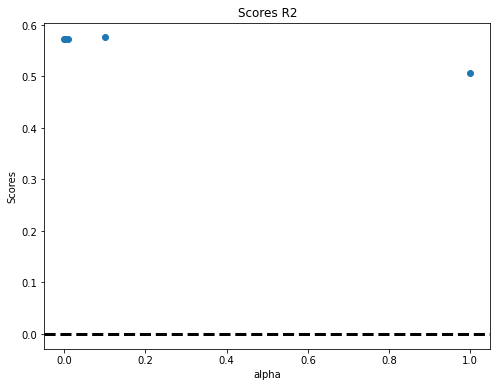

In [ ]:
ridge_fig = plot_scores(ridge_scores, alphas)

b) Mostre o mesmo para normalize=False.

In [ ]:
ridge_scores = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha,  normalize=False)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_scores.append(ridge.score(X_test, y_test))
ridge_scores


[0.5727602469962478,
 0.5727626557285523,
 0.5727865833201518,
 0.5730112400738826,
 0.574505981755235]

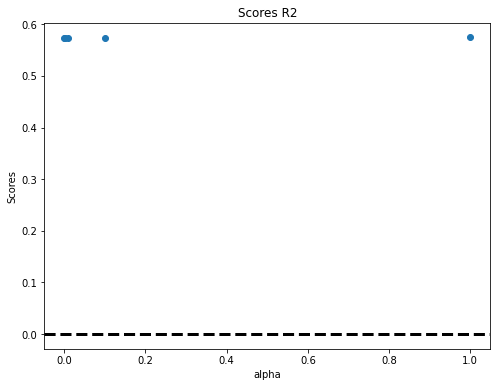

In [ ]:
ridge_fig = plot_scores(ridge_scores, alphas)

c) Agora pegue os hiperparâmetros do melhor resultado que você obteve. Treine um novo modelo usando-os, mas mudando agora a quantidade de épocas (hiperparâmetro max_iter) para apenas 10 (o valor default é 1000). Qual o score R^2 sobre o conjunto de teste para o novo modelo?

In [ ]:
ridge = Ridge(alpha = 1.e-01,  normalize=True, max_iter=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.5756943332948612

3- Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database (link alternativo no Kaggle)". 



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UFC/2021.1/ML/dataset/diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LogisticRegression(max_iter=2000);
lr.fit(X_treino,y_treino);
lr.score(X_treino,y_treino)

0.7703583061889251

In [ ]:
#Penalty l1
colums = {'Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI'
          , 'DiabetesPedigreeFunction', 'Age'}
alphas =  np.logspace(-4, 0,5)
coef = []
scores = []
for alpha in alphas:
  lr = LogisticRegression(penalty='l1', max_iter=10000,solver='liblinear', C=alpha);
  lr.fit(X_treino,y_treino);
  coef = lr.coef_
  cf = {'Pregnancies': coef[0][0], 
        'Glucose': coef[0][1], 
        'BloodPressure': coef[0][2],
        'SkinThickness': coef[0][3], 
        'Insulin': coef[0][4], 
        'BMI': coef[0][5], 
        'DiabetesPedigreeFunction': coef[0][6], 
        'Age': coef[0][7], 'Alpha': alpha}
  scores.append(cf)
  #coef.append(lr.score(X_treino,y_treino))
grid = pd.DataFrame(scores, columns=['Alpha','Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI'
          , 'DiabetesPedigreeFunction', 'Age'])
grid.head(5)

,Alpha,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0010,0.000000,0.000793,-0.008210,0.000000,0.000308,0.000000,0.000000,0.000000
2,0.0100,0.009648,0.010756,-0.028464,0.000000,0.000263,0.000000,0.000000,0.004124
3,0.1000,0.062278,0.021577,-0.020535,0.001456,-0.000474,0.043686,0.000000,0.017555
4,1.0000,0.063816,0.032267,-0.014639,0.003029,-0.001617,0.094017,0.547123,0.034439


In [ ]:
#Penalty elasticnet
alphas =  np.logspace(-4, 0,20)
scores = []
for alpha in alphas:
  lr = LogisticRegression(penalty='elasticnet', max_iter=20000,solver='saga', C=alpha, l1_ratio=0.5);
  lr.fit(X_treino,y_treino);
  accuracy = {'alpha': alpha, 'accuracy': lr.score(X_treino,y_treino)}
  scores.append(accuracy)

grid = pd.DataFrame(scores, columns=['alpha','accuracy'])
grid.sort_values(by='accuracy', ascending=False)

,alpha,accuracy
10,0.012743,0.682410
9,0.007848,0.679153
11,0.020691,0.679153
12,0.033598,0.675896
18,0.615848,0.674267
19,1.000000,0.674267
6,0.001833,0.672638
15,0.143845,0.672638
16,0.233572,0.672638
17,0.379269,0.672638


In [ ]:
#Penalty None
scores = []
lr = LogisticRegression(penalty='none', max_iter=10000);
lr.fit(X_treino,y_treino);
lr.score(X_treino,y_treino)

0.7703583061889251

In [ ]:
#Penalty = L2
alphas =  np.logspace(-4, 0,20)
scores = []
for alpha in alphas:
  lr = LogisticRegression(penalty='l2', solver='liblinear', C=alpha);
  lr.fit(X_treino,y_treino);
  accuracy = {'alpha': alpha, 'accuracy': lr.score(X_treino,y_treino)}
  scores.append(accuracy)

grid = pd.DataFrame(scores, columns=['alpha','accuracy'])
grid.sort_values(by='accuracy', ascending=False)

,alpha,accuracy
18,0.615848,0.775244
19,1.000000,0.770358
17,0.379269,0.760586
16,0.233572,0.742671
15,0.143845,0.726384
14,0.088587,0.714984
13,0.054556,0.698697
12,0.033598,0.695440
11,0.020691,0.692182
10,0.012743,0.684039
